In [54]:
import numpy as np 
import pandas as pd

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms 
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [4]:
import warnings 
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv('C:\\Users\\GPT BANTWAL\\Downloads\\archive\\data-MYoQk.csv')
df

Project title  Country        City Environment  \
0                     Broadway   Canada   Vancouver       Urban   
1                      Vaughan   Canada     Toronto       Urban   
2                  Scarborough   Canada     Toronto       Urban   
3                      Ontario   Canada     Toronto       Urban   
4       Yonge to Richmond Hill   Canada     Toronto       Urban   
..                         ...      ...         ...         ...   
133  Extension to Bourtzwiller   France    Mulhouse       Urban   
134           U4 to Eibbrucken  Germany     Hamburg       Urban   
135          U4 to HafenCity U  Germany     Hamburg       Urban   
136              Wehrhahn line  Germany  Dusseldorf       Urban   
137   Phase 2 Nottingham Trams       UK  Nottingham       Urban   

         Line name                                        Description  \
0        Millenium  Extension of existing millennium line to add i...   
1           Line 1       Extension of existing line to a new terminus   
2           Line 2  Will extend existing subway to the city of Sca...   
3     Ontario Line             New line through the centre of Toronto   
4           Line 1          Extending an existing line to new suburbs   
..             ...                                                ...   
133  Mulhouse Tram  Construction of an extension of the existing line   
134             U4                     Extension of the existing line   
135             U4                     Extension of the existing line   
136  Wehrhahn Line  Construction of a new metro for Dusseldorf tha...   
137        Phase 2  Construction of an extension to the south and ...   

              Status Start planning Start Construction End Year  ...  \
0    In construction           2018               2020     2025  ...   
1           Complete           2005               2009     2017  ...   
2    In construction           2020               2023     2030  ...   
3    In construction           2019               2022     2031  ...   
4    In construction           2021               2023     2030  ...   
..               ...            ...                ...      ...  ...   
133         Complete              ?               2007     2009  ...   
134         Complete           2013               2014     2018  ...   
135         Complete              ?               2007     2012  ...   
136         Complete              ?               2007     2016  ...   
137         Complete           2006               2012     2015  ...   

     Elevated percentage    Source Cost (m) Currency  Year  \
0                     5%  Database   2830.0      CAD  2018   
1                     0%  Database   3200.0      CAD  2013   
2                     0%  Database   5500.0      CAD  2018   
3                    37%  Database  19000.0      CAD  2022   
4                     0%  Database   5600.0      CAD  2020   
..                   ...       ...      ...      ...   ...   
133                   0%     Media     25.5      EUR  2009   
134                   0%  Database    178.0      EUR  2016   
135                   0%  Database    326.0      EUR  2009   
136                   0%  Database    929.0      EUR  2012   
137                   0%     Media    570.0      GBP  2015   

    Converted to mil GBP CPI adjusted (mil GBP) Cost per mile (mil GBP)  \
0                   1637                   1966                     555   
1                   1985                   2566                     480   
2                   3180                   3821                     789   
3                  11820                  12884                    1338   
4                   3256                   3778                     822   
..                   ...                    ...                     ...   
133                   23                     33                      35   
134                  146                    183                     227   
135                  290                    420   

In [7]:
df.dtypes

Project title               object
Country                     object
City                        object
Environment                 object
Line name                   object
Description                 object
Status                      object
Start planning              object
Start Construction          object
End Year                    object
Length (Miles)             float64
Number of Stations           int64
Type of project             object
Type of Line                object
Tunnelling method           object
Tunnel percentage           object
Elevated percentage         object
Source                      object
Cost (m)                   float64
Currency                    object
Year                         int64
Converted to mil GBP         int64
CPI adjusted (mil GBP)       int64
Cost per mile (mil GBP)      int64
Source 1                    object
Source 2                    object
dtype: object

In [8]:
df.head()

Project title Country       City Environment     Line name  \
0                Broadway  Canada  Vancouver       Urban     Millenium   
1                 Vaughan  Canada    Toronto       Urban        Line 1   
2             Scarborough  Canada    Toronto       Urban        Line 2   
3                 Ontario  Canada    Toronto       Urban  Ontario Line   
4  Yonge to Richmond Hill  Canada    Toronto       Urban        Line 1   

                                         Description           Status  \
0  Extension of existing millennium line to add i...  In construction   
1       Extension of existing line to a new terminus         Complete   
2  Will extend existing subway to the city of Sca...  In construction   
3             New line through the centre of Toronto  In construction   
4          Extending an existing line to new suburbs  In construction   

  Start planning Start Construction End Year  ...  Elevated percentage  \
0           2018               2020     2025  ...                   5%   
1           2005               2009     2017  ...                   0%   
2           2020               2023     2030  ...                   0%   
3           2019               2022     2031  ...                  37%   
4           2021               2023     2030  ...                   0%   

     Source Cost (m) Currency  Year Converted to mil GBP  \
0  Database   2830.0      CAD  2018                 1637   
1  Database   3200.0      CAD  2013                 1985   
2  Database   5500.0      CAD  2018                 3180   
3  Database  19000.0      CAD  2022                11820   
4  Database   5600.0      CAD  2020                 3256   

  CPI adjusted (mil GBP) Cost per mile (mil GBP)  \
0                   1966                     555   
1                   2566                     480   
2                   3821                     789   
3                  12884                    1338   
4                   3778                     822   

                                            Source 1  \
0     https://transitcosts.com/vancouver-broadway-2/   
1          https://transitcosts.com/toronto-vaughan/   
2    https://transitcosts.com/toronto-scarborough-2/   
3        https://transitcosts.com/toronto-ontario-2/   
4  https://transitcosts.com/toronto-yonge-to-rich...   

                                            Source 2  
0                                                NaN  
1                                                NaN  
2                                                NaN  
3  https://www.thestar.com/news/gta/2022/11/23/on...  
4                                                NaN  

[5 rows x 26 columns]

In [9]:
df.tail()

Project title  Country        City Environment  \
133  Extension to Bourtzwiller   France    Mulhouse       Urban   
134           U4 to Eibbrucken  Germany     Hamburg       Urban   
135          U4 to HafenCity U  Germany     Hamburg       Urban   
136              Wehrhahn line  Germany  Dusseldorf       Urban   
137   Phase 2 Nottingham Trams       UK  Nottingham       Urban   

         Line name                                        Description  \
133  Mulhouse Tram  Construction of an extension of the existing line   
134             U4                     Extension of the existing line   
135             U4                     Extension of the existing line   
136  Wehrhahn Line  Construction of a new metro for Dusseldorf tha...   
137        Phase 2  Construction of an extension to the south and ...   

       Status Start planning Start Construction End Year  ...  \
133  Complete              ?               2007     2009  ...   
134  Complete           2013               2014     2018  ...   
135  Complete              ?               2007     2012  ...   
136  Complete              ?               2007     2016  ...   
137  Complete           2006               2012     2015  ...   

     Elevated percentage    Source Cost (m) Currency  Year  \
133                   0%     Media     25.5      EUR  2009   
134                   0%  Database    178.0      EUR  2016   
135                   0%  Database    326.0      EUR  2009   
136                   0%  Database    929.0      EUR  2012   
137                   0%     Media    570.0      GBP  2015   

    Converted to mil GBP CPI adjusted (mil GBP) Cost per mile (mil GBP)  \
133                   23                     33                      35   
134                  146                    183                     227   
135                  290                    420                     173   
136                  753                    998                     472   
137                  570                    722                      66   

                                              Source 1 Source 2  
133  https://www.railwaygazette.com/mulhouse-tram-l...      NaN  
134  https://transitcosts.com/hamburg-u4-to-elbbruc...      NaN  
135  https://transitcosts.com/hamburg-u4-to-hafenci...      NaN  
136  https://transitcosts.com/dusseldorf-wehrhahn-l...      NaN  
137  http://www.infrastructure-intelligence.com/art...      NaN  

[5 rows x 26 columns]

In [10]:
df.describe()

Length (Miles)  Number of Stations      Cost (m)         Year  \
count      138.000000          138.000000  1.380000e+02   138.000000   
mean        16.331806           10.485507  1.280785e+05  2014.449275   
std         31.247769           12.383316  7.307356e+05     6.088247   
min          0.430000            0.000000  2.550000e+01  2000.000000   
25%          2.640000            2.250000  3.992500e+02  2010.250000   
50%          5.870000            6.000000  1.443650e+03  2015.000000   
75%         11.770000           15.000000  5.575000e+03  2020.000000   
max        186.340000           68.000000  5.700000e+06  2023.000000   

       Converted to mil GBP  CPI adjusted (mil GBP)  Cost per mile (mil GBP)  
count            138.000000              138.000000               138.000000  
mean            2429.884058             2968.514493               371.217391  
std             5441.881471             6374.796669               623.070238  
min               23.000000               33.000000                 3.000000  
25%              327.000000              428.500000                84.750000  
50%              940.500000             1216.500000               186.000000  
75%             2168.500000             2729.000000               431.750000  
max            45000.000000            53101.000000              5244.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Project title            138 non-null    object 
 1   Country                  138 non-null    object 
 2   City                     138 non-null    object 
 3   Environment              138 non-null    object 
 4   Line name                138 non-null    object 
 5   Description              138 non-null    object 
 6   Status                   138 non-null    object 
 7   Start planning           137 non-null    object 
 8   Start Construction       138 non-null    object 
 9   End Year                 138 non-null    object 
 10  Length (Miles)           138 non-null    float64
 11  Number of Stations       138 non-null    int64  
 12  Type of project          138 non-null    object 
 13  Type of Line             138 non-null    object 
 14  Tunnelling method        9

In [12]:
df.shape

(138, 26)

In [13]:
df.columns

Index(['Project title', 'Country', 'City', 'Environment', 'Line name',
       'Description', 'Status', 'Start planning', 'Start Construction',
       'End Year', 'Length (Miles)', 'Number of Stations', 'Type of project',
       'Type of Line', 'Tunnelling method', 'Tunnel percentage',
       'Elevated percentage', 'Source', 'Cost (m)', 'Currency', 'Year',
       'Converted to mil GBP', 'CPI adjusted (mil GBP)',
       'Cost per mile (mil GBP)', 'Source 1', 'Source 2'],
      dtype='object')

In [14]:
df.isna

<bound method DataFrame.isna of                  Project title  Country        City Environment  \
0                     Broadway   Canada   Vancouver       Urban   
1                      Vaughan   Canada     Toronto       Urban   
2                  Scarborough   Canada     Toronto       Urban   
3                      Ontario   Canada     Toronto       Urban   
4       Yonge to Richmond Hill   Canada     Toronto       Urban   
..                         ...      ...         ...         ...   
133  Extension to Bourtzwiller   France    Mulhouse       Urban   
134           U4 to Eibbrucken  Germany     Hamburg       Urban   
135          U4 to HafenCity U  Germany     Hamburg       Urban   
136              Wehrhahn line  Germany  Dusseldorf       Urban   
137   Phase 2 Nottingham Trams       UK  Nottingham       Urban   

         Line name                                        Description  \
0        Millenium  Extension of existing millennium line to add i...   
1           Line 

In [15]:
df.isnull().sum()

Project title                0
Country                      0
City                         0
Environment                  0
Line name                    0
Description                  0
Status                       0
Start planning               1
Start Construction           0
End Year                     0
Length (Miles)               0
Number of Stations           0
Type of project              0
Type of Line                 0
Tunnelling method           43
Tunnel percentage            0
Elevated percentage          0
Source                       0
Cost (m)                     0
Currency                     0
Year                         0
Converted to mil GBP         0
CPI adjusted (mil GBP)       0
Cost per mile (mil GBP)      0
Source 1                     0
Source 2                   126
dtype: int64

<Axes: >

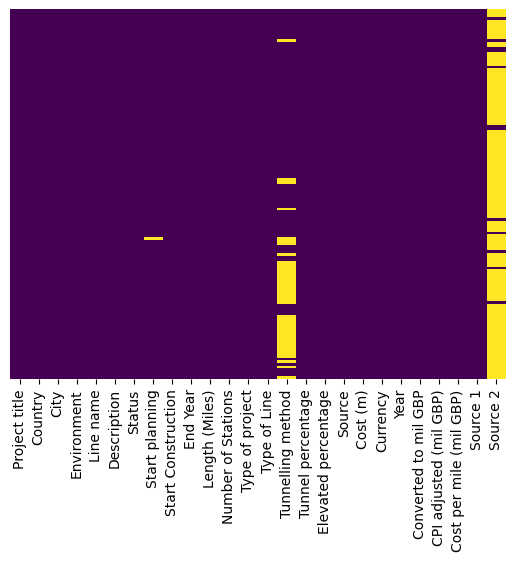

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: >

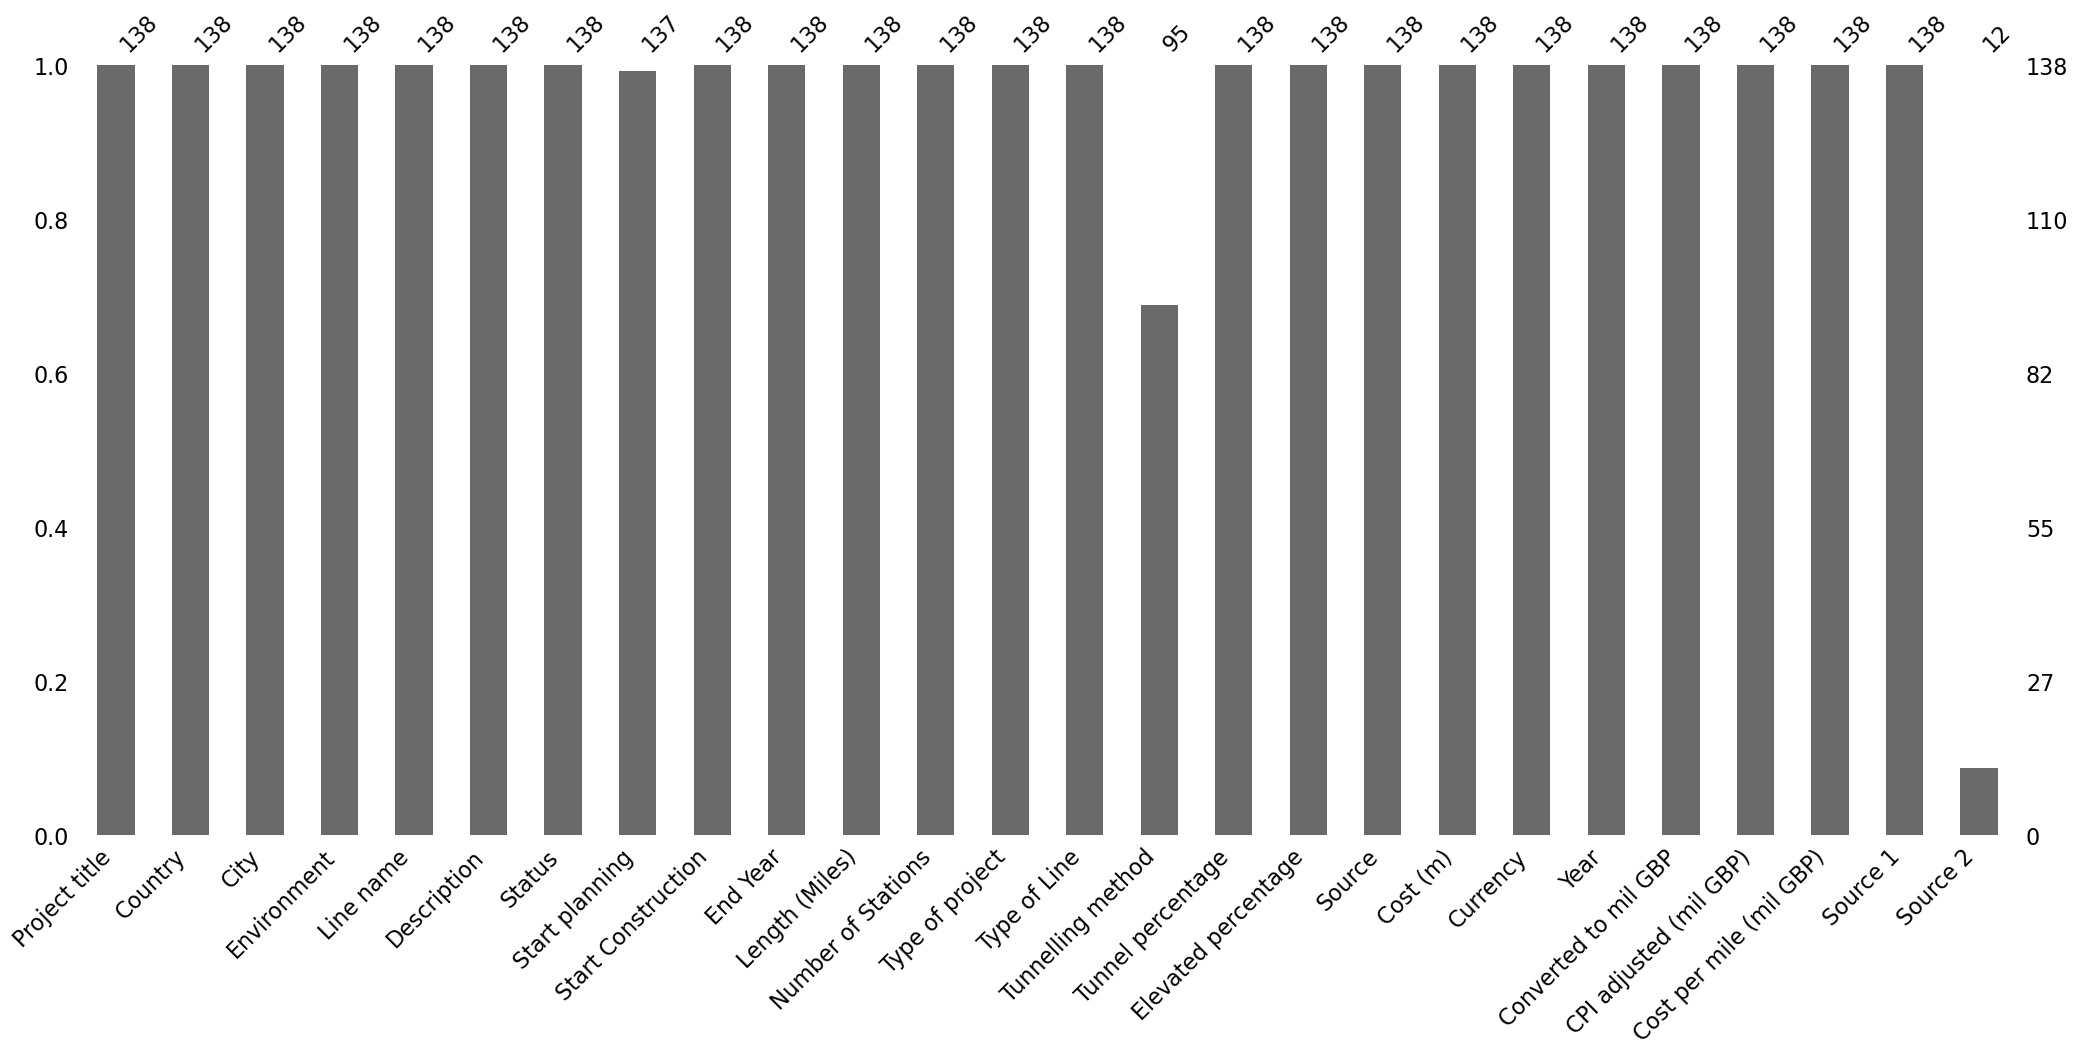

In [17]:
ms.bar(df)

<Axes: >

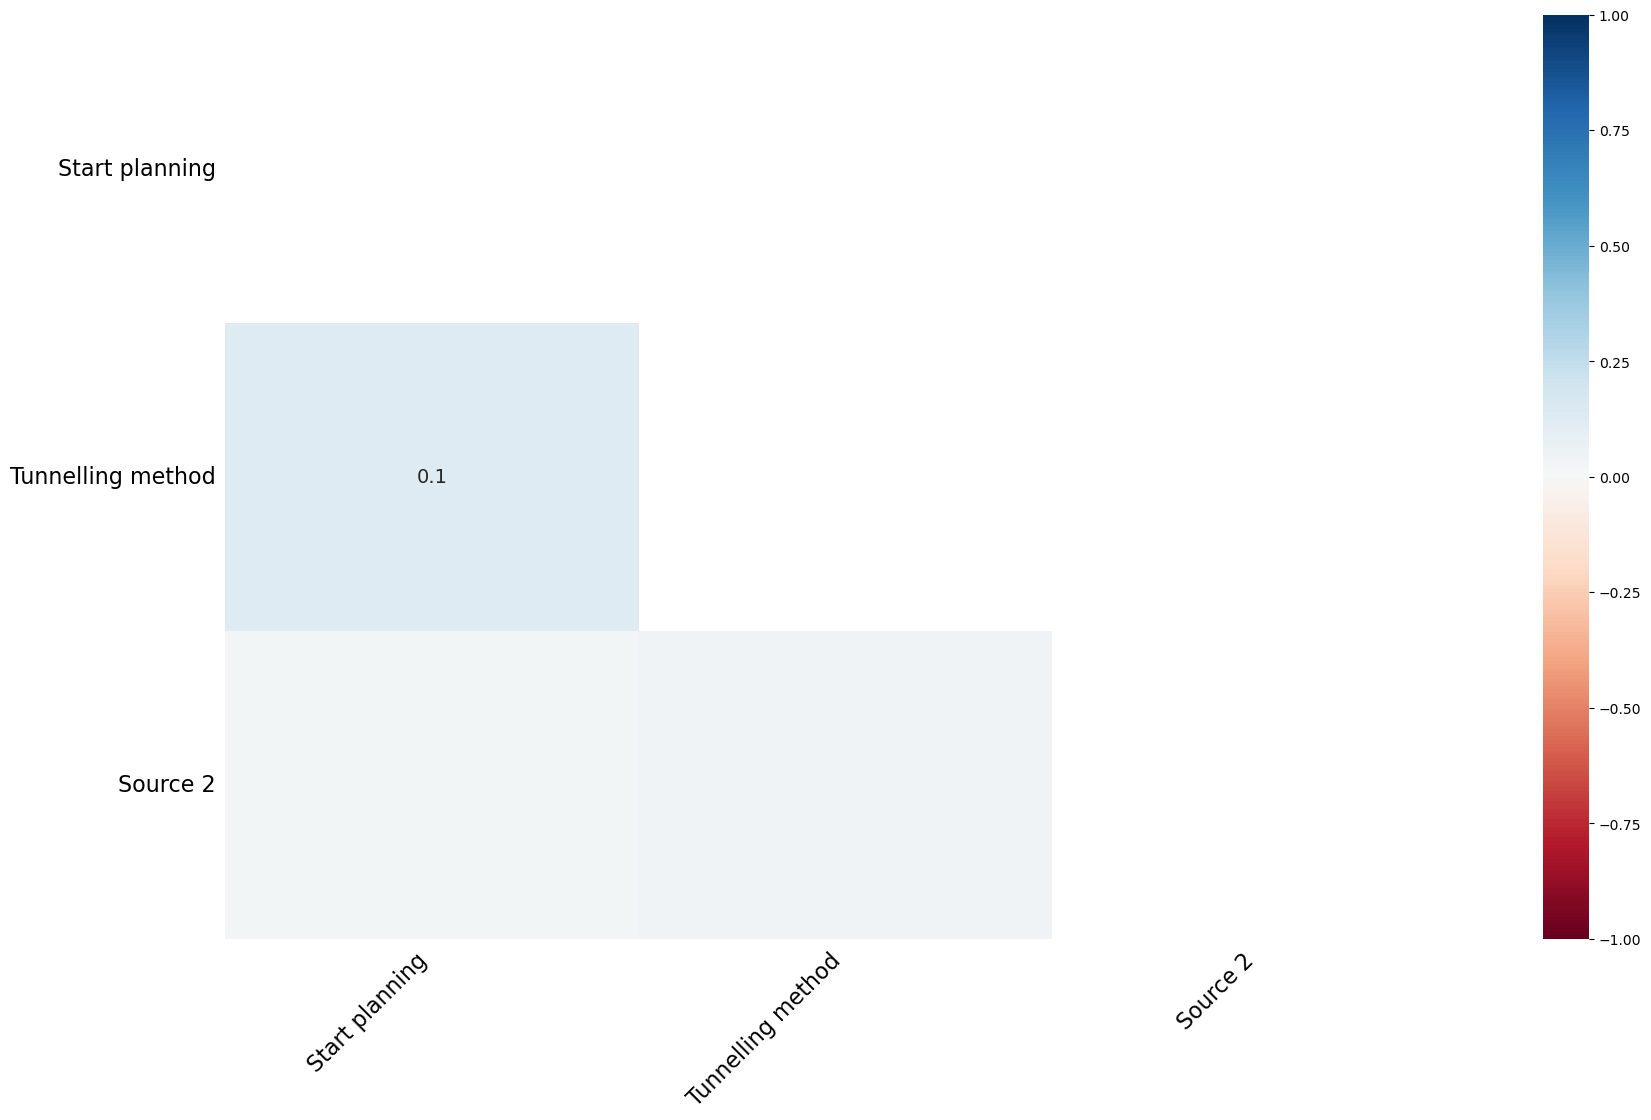

In [18]:
ms.heatmap(df)

<Axes: >

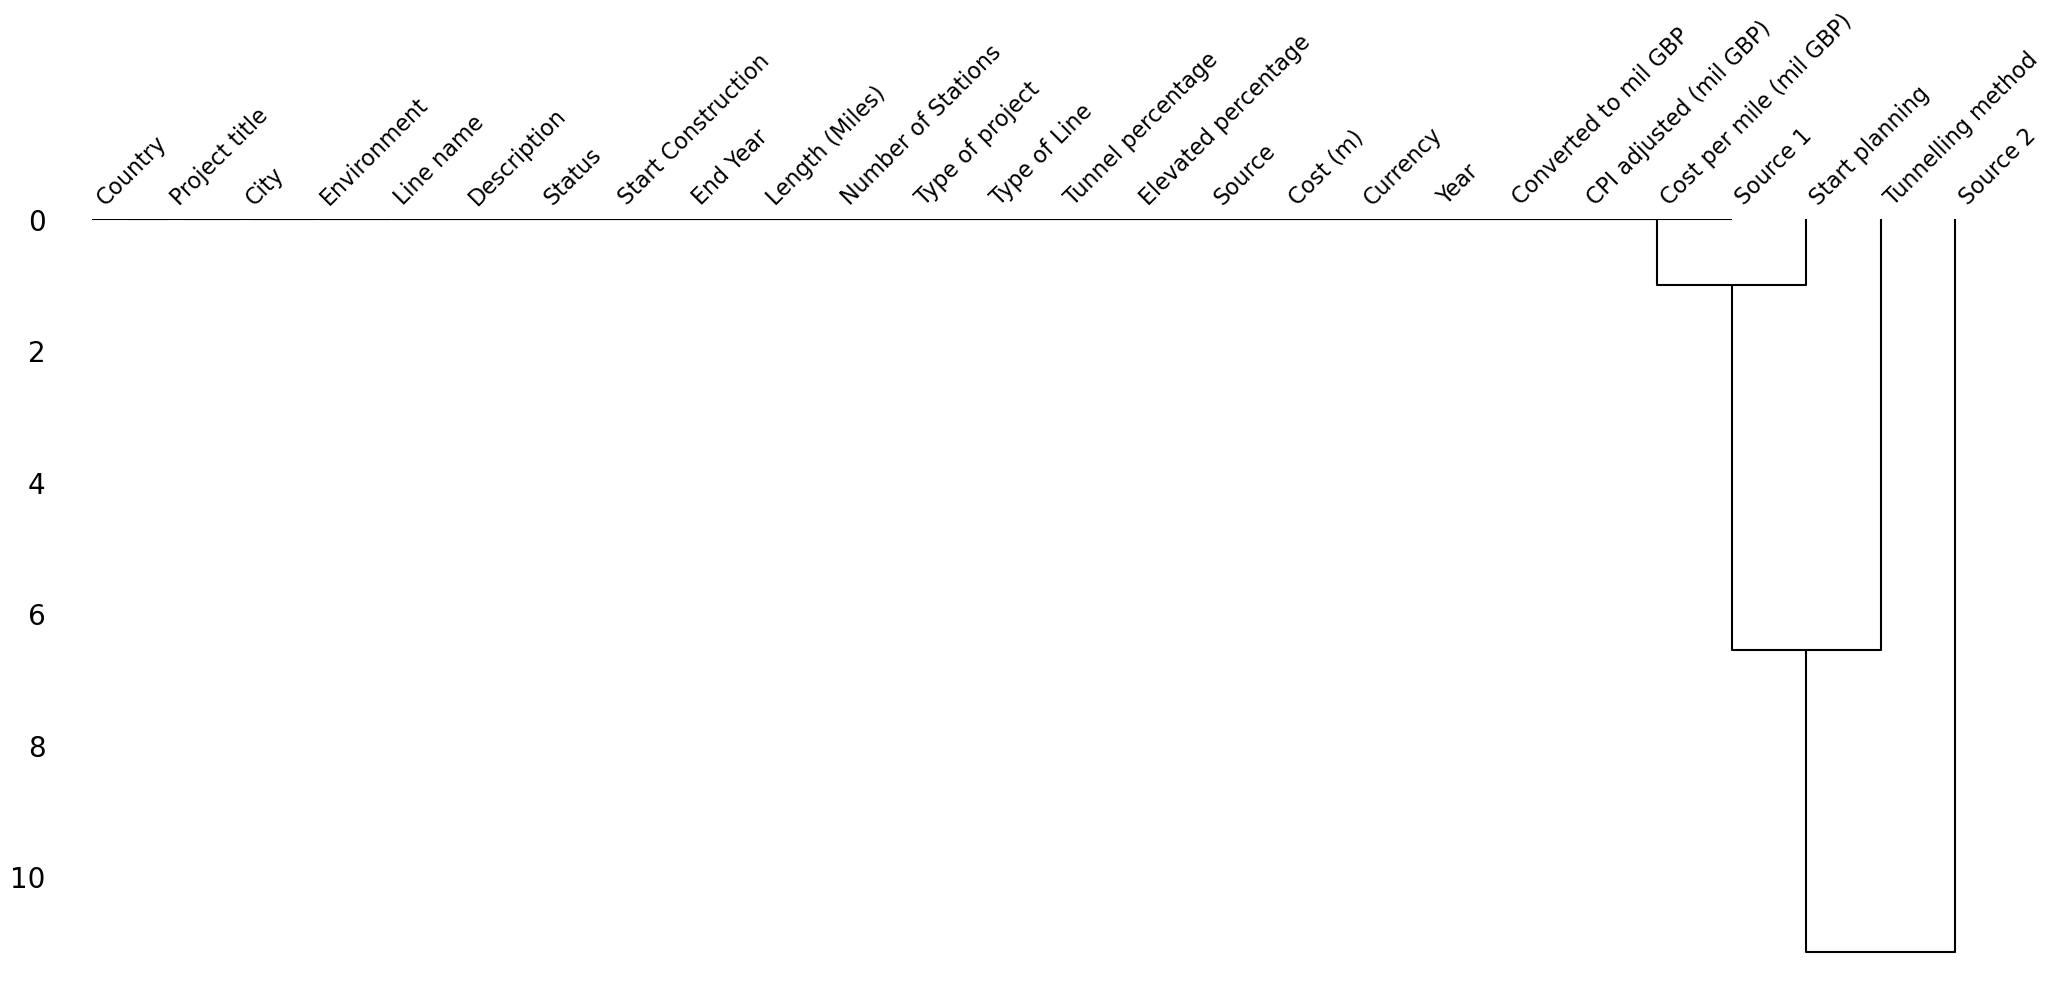

In [19]:
ms.dendrogram(df)

<Axes: >

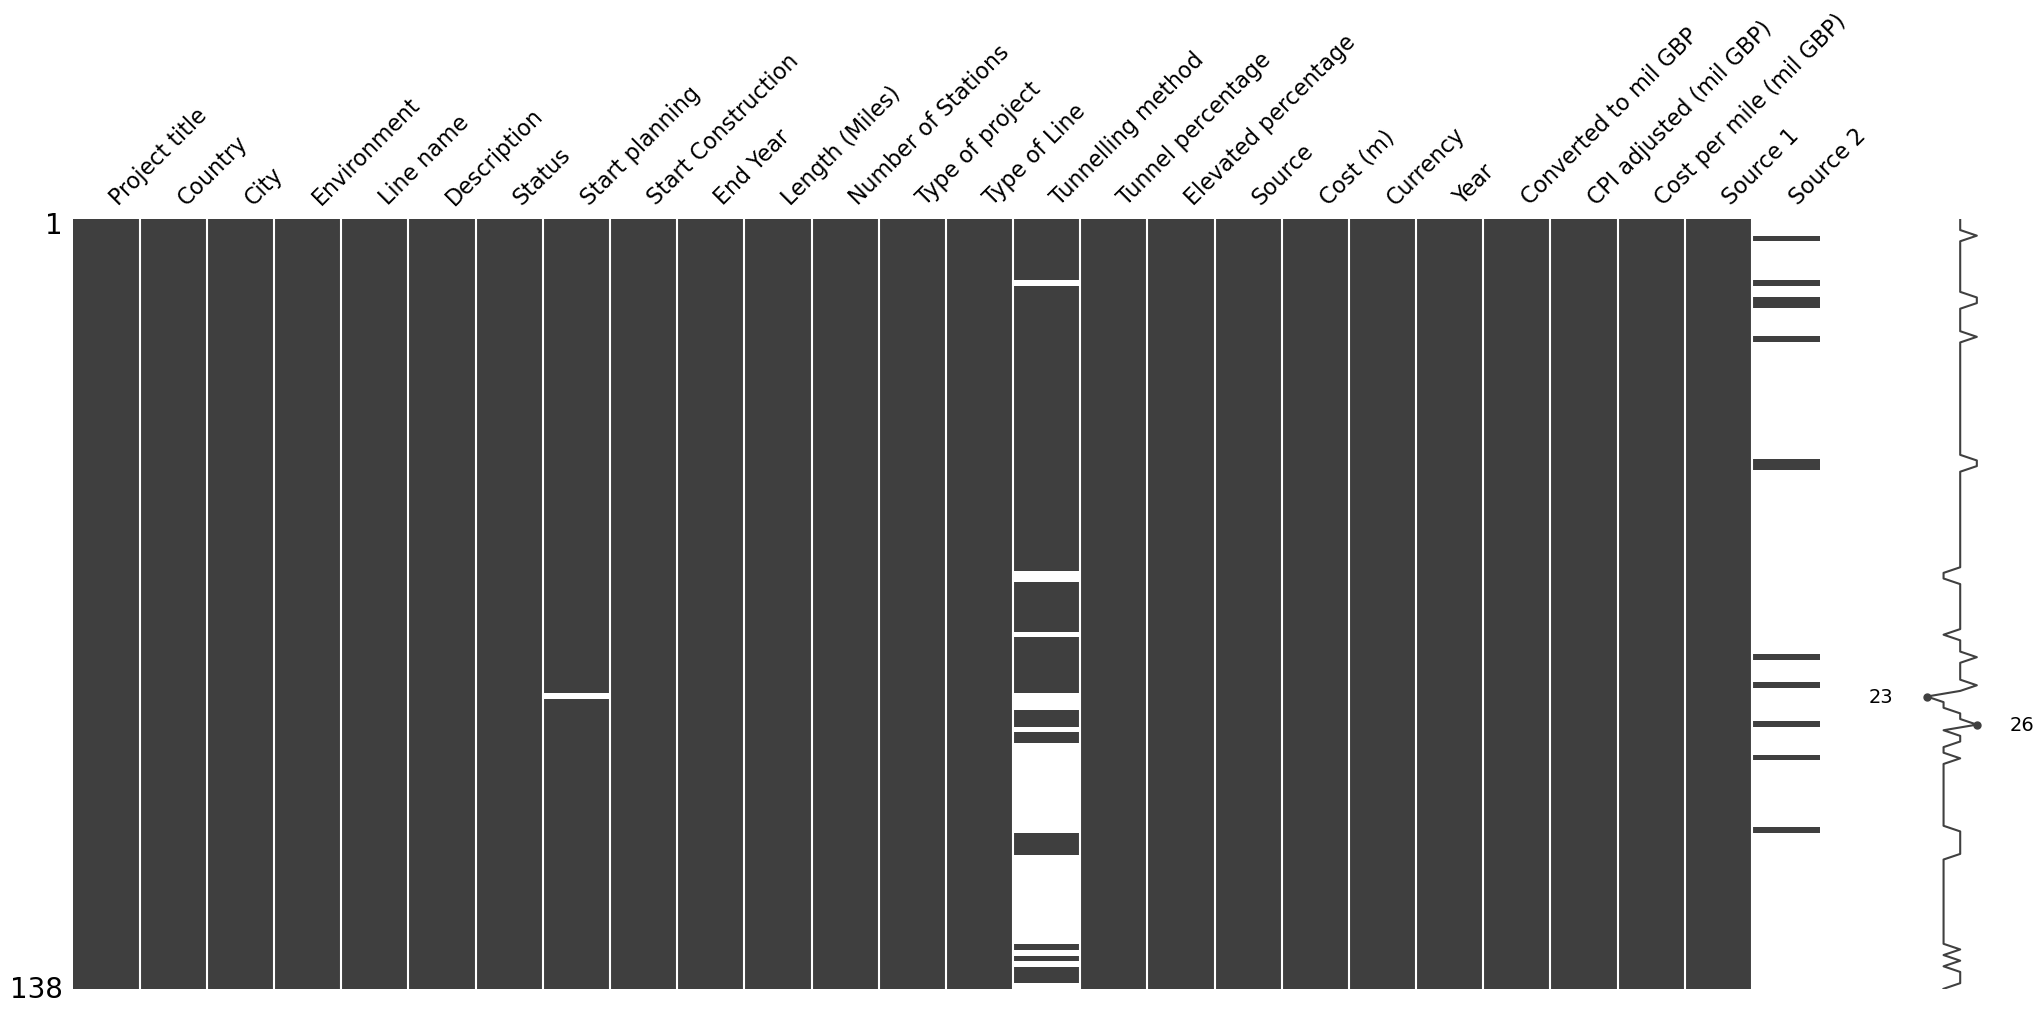

In [20]:
ms.matrix(df)

In [21]:
df["Tunnelling method"].fillna("Unknown", inplace = True)  
  
df

Project title  Country        City Environment  \
0                     Broadway   Canada   Vancouver       Urban   
1                      Vaughan   Canada     Toronto       Urban   
2                  Scarborough   Canada     Toronto       Urban   
3                      Ontario   Canada     Toronto       Urban   
4       Yonge to Richmond Hill   Canada     Toronto       Urban   
..                         ...      ...         ...         ...   
133  Extension to Bourtzwiller   France    Mulhouse       Urban   
134           U4 to Eibbrucken  Germany     Hamburg       Urban   
135          U4 to HafenCity U  Germany     Hamburg       Urban   
136              Wehrhahn line  Germany  Dusseldorf       Urban   
137   Phase 2 Nottingham Trams       UK  Nottingham       Urban   

         Line name                                        Description  \
0        Millenium  Extension of existing millennium line to add i...   
1           Line 1       Extension of existing line to a new terminus   
2           Line 2  Will extend existing subway to the city of Sca...   
3     Ontario Line             New line through the centre of Toronto   
4           Line 1          Extending an existing line to new suburbs   
..             ...                                                ...   
133  Mulhouse Tram  Construction of an extension of the existing line   
134             U4                     Extension of the existing line   
135             U4                     Extension of the existing line   
136  Wehrhahn Line  Construction of a new metro for Dusseldorf tha...   
137        Phase 2  Construction of an extension to the south and ...   

              Status Start planning Start Construction End Year  ...  \
0    In construction           2018               2020     2025  ...   
1           Complete           2005               2009     2017  ...   
2    In construction           2020               2023     2030  ...   
3    In construction           2019               2022     2031  ...   
4    In construction           2021               2023     2030  ...   
..               ...            ...                ...      ...  ...   
133         Complete              ?               2007     2009  ...   
134         Complete           2013               2014     2018  ...   
135         Complete              ?               2007     2012  ...   
136         Complete              ?               2007     2016  ...   
137         Complete           2006               2012     2015  ...   

     Elevated percentage    Source Cost (m) Currency  Year  \
0                     5%  Database   2830.0      CAD  2018   
1                     0%  Database   3200.0      CAD  2013   
2                     0%  Database   5500.0      CAD  2018   
3                    37%  Database  19000.0      CAD  2022   
4                     0%  Database   5600.0      CAD  2020   
..                   ...       ...      ...      ...   ...   
133                   0%     Media     25.5      EUR  2009   
134                   0%  Database    178.0      EUR  2016   
135                   0%  Database    326.0      EUR  2009   
136                   0%  Database    929.0      EUR  2012   
137                   0%     Media    570.0      GBP  2015   

    Converted to mil GBP CPI adjusted (mil GBP) Cost per mile (mil GBP)  \
0                   1637                   1966                     555   
1                   1985                   2566                     480   
2                   3180                   3821                     789   
3                  11820                  12884                    1338   
4                   3256                   3778                     822   
..                   ...                    ...                     ...   
133                   23                     33                      35   
134                  146                    183                     227   
135                  290                    420   

In [22]:
df["Start planning"].fillna("Unknown", inplace = True)  
  
df

Project title  Country        City Environment  \
0                     Broadway   Canada   Vancouver       Urban   
1                      Vaughan   Canada     Toronto       Urban   
2                  Scarborough   Canada     Toronto       Urban   
3                      Ontario   Canada     Toronto       Urban   
4       Yonge to Richmond Hill   Canada     Toronto       Urban   
..                         ...      ...         ...         ...   
133  Extension to Bourtzwiller   France    Mulhouse       Urban   
134           U4 to Eibbrucken  Germany     Hamburg       Urban   
135          U4 to HafenCity U  Germany     Hamburg       Urban   
136              Wehrhahn line  Germany  Dusseldorf       Urban   
137   Phase 2 Nottingham Trams       UK  Nottingham       Urban   

         Line name                                        Description  \
0        Millenium  Extension of existing millennium line to add i...   
1           Line 1       Extension of existing line to a new terminus   
2           Line 2  Will extend existing subway to the city of Sca...   
3     Ontario Line             New line through the centre of Toronto   
4           Line 1          Extending an existing line to new suburbs   
..             ...                                                ...   
133  Mulhouse Tram  Construction of an extension of the existing line   
134             U4                     Extension of the existing line   
135             U4                     Extension of the existing line   
136  Wehrhahn Line  Construction of a new metro for Dusseldorf tha...   
137        Phase 2  Construction of an extension to the south and ...   

              Status Start planning Start Construction End Year  ...  \
0    In construction           2018               2020     2025  ...   
1           Complete           2005               2009     2017  ...   
2    In construction           2020               2023     2030  ...   
3    In construction           2019               2022     2031  ...   
4    In construction           2021               2023     2030  ...   
..               ...            ...                ...      ...  ...   
133         Complete              ?               2007     2009  ...   
134         Complete           2013               2014     2018  ...   
135         Complete              ?               2007     2012  ...   
136         Complete              ?               2007     2016  ...   
137         Complete           2006               2012     2015  ...   

     Elevated percentage    Source Cost (m) Currency  Year  \
0                     5%  Database   2830.0      CAD  2018   
1                     0%  Database   3200.0      CAD  2013   
2                     0%  Database   5500.0      CAD  2018   
3                    37%  Database  19000.0      CAD  2022   
4                     0%  Database   5600.0      CAD  2020   
..                   ...       ...      ...      ...   ...   
133                   0%     Media     25.5      EUR  2009   
134                   0%  Database    178.0      EUR  2016   
135                   0%  Database    326.0      EUR  2009   
136                   0%  Database    929.0      EUR  2012   
137                   0%     Media    570.0      GBP  2015   

    Converted to mil GBP CPI adjusted (mil GBP) Cost per mile (mil GBP)  \
0                   1637                   1966                     555   
1                   1985                   2566                     480   
2                   3180                   3821                     789   
3                  11820                  12884                    1338   
4                   3256                   3778                     822   
..                   ...                    ...                     ...   
133                   23                     33                      35   
134                  146                    183                     227   
135                  290                    420   

In [23]:
df = df.drop(columns=['Source 2'])

<Axes: >

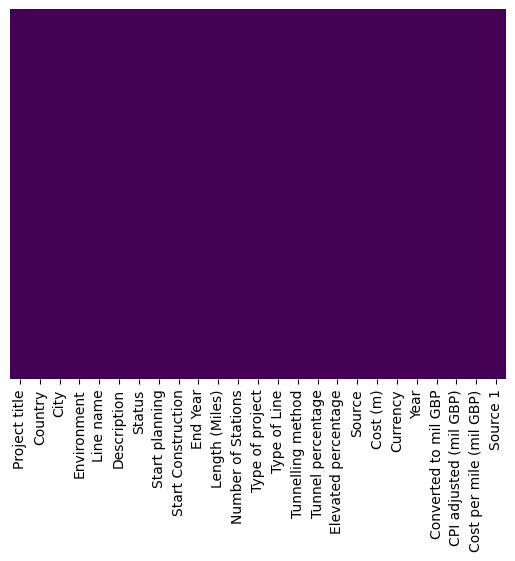

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

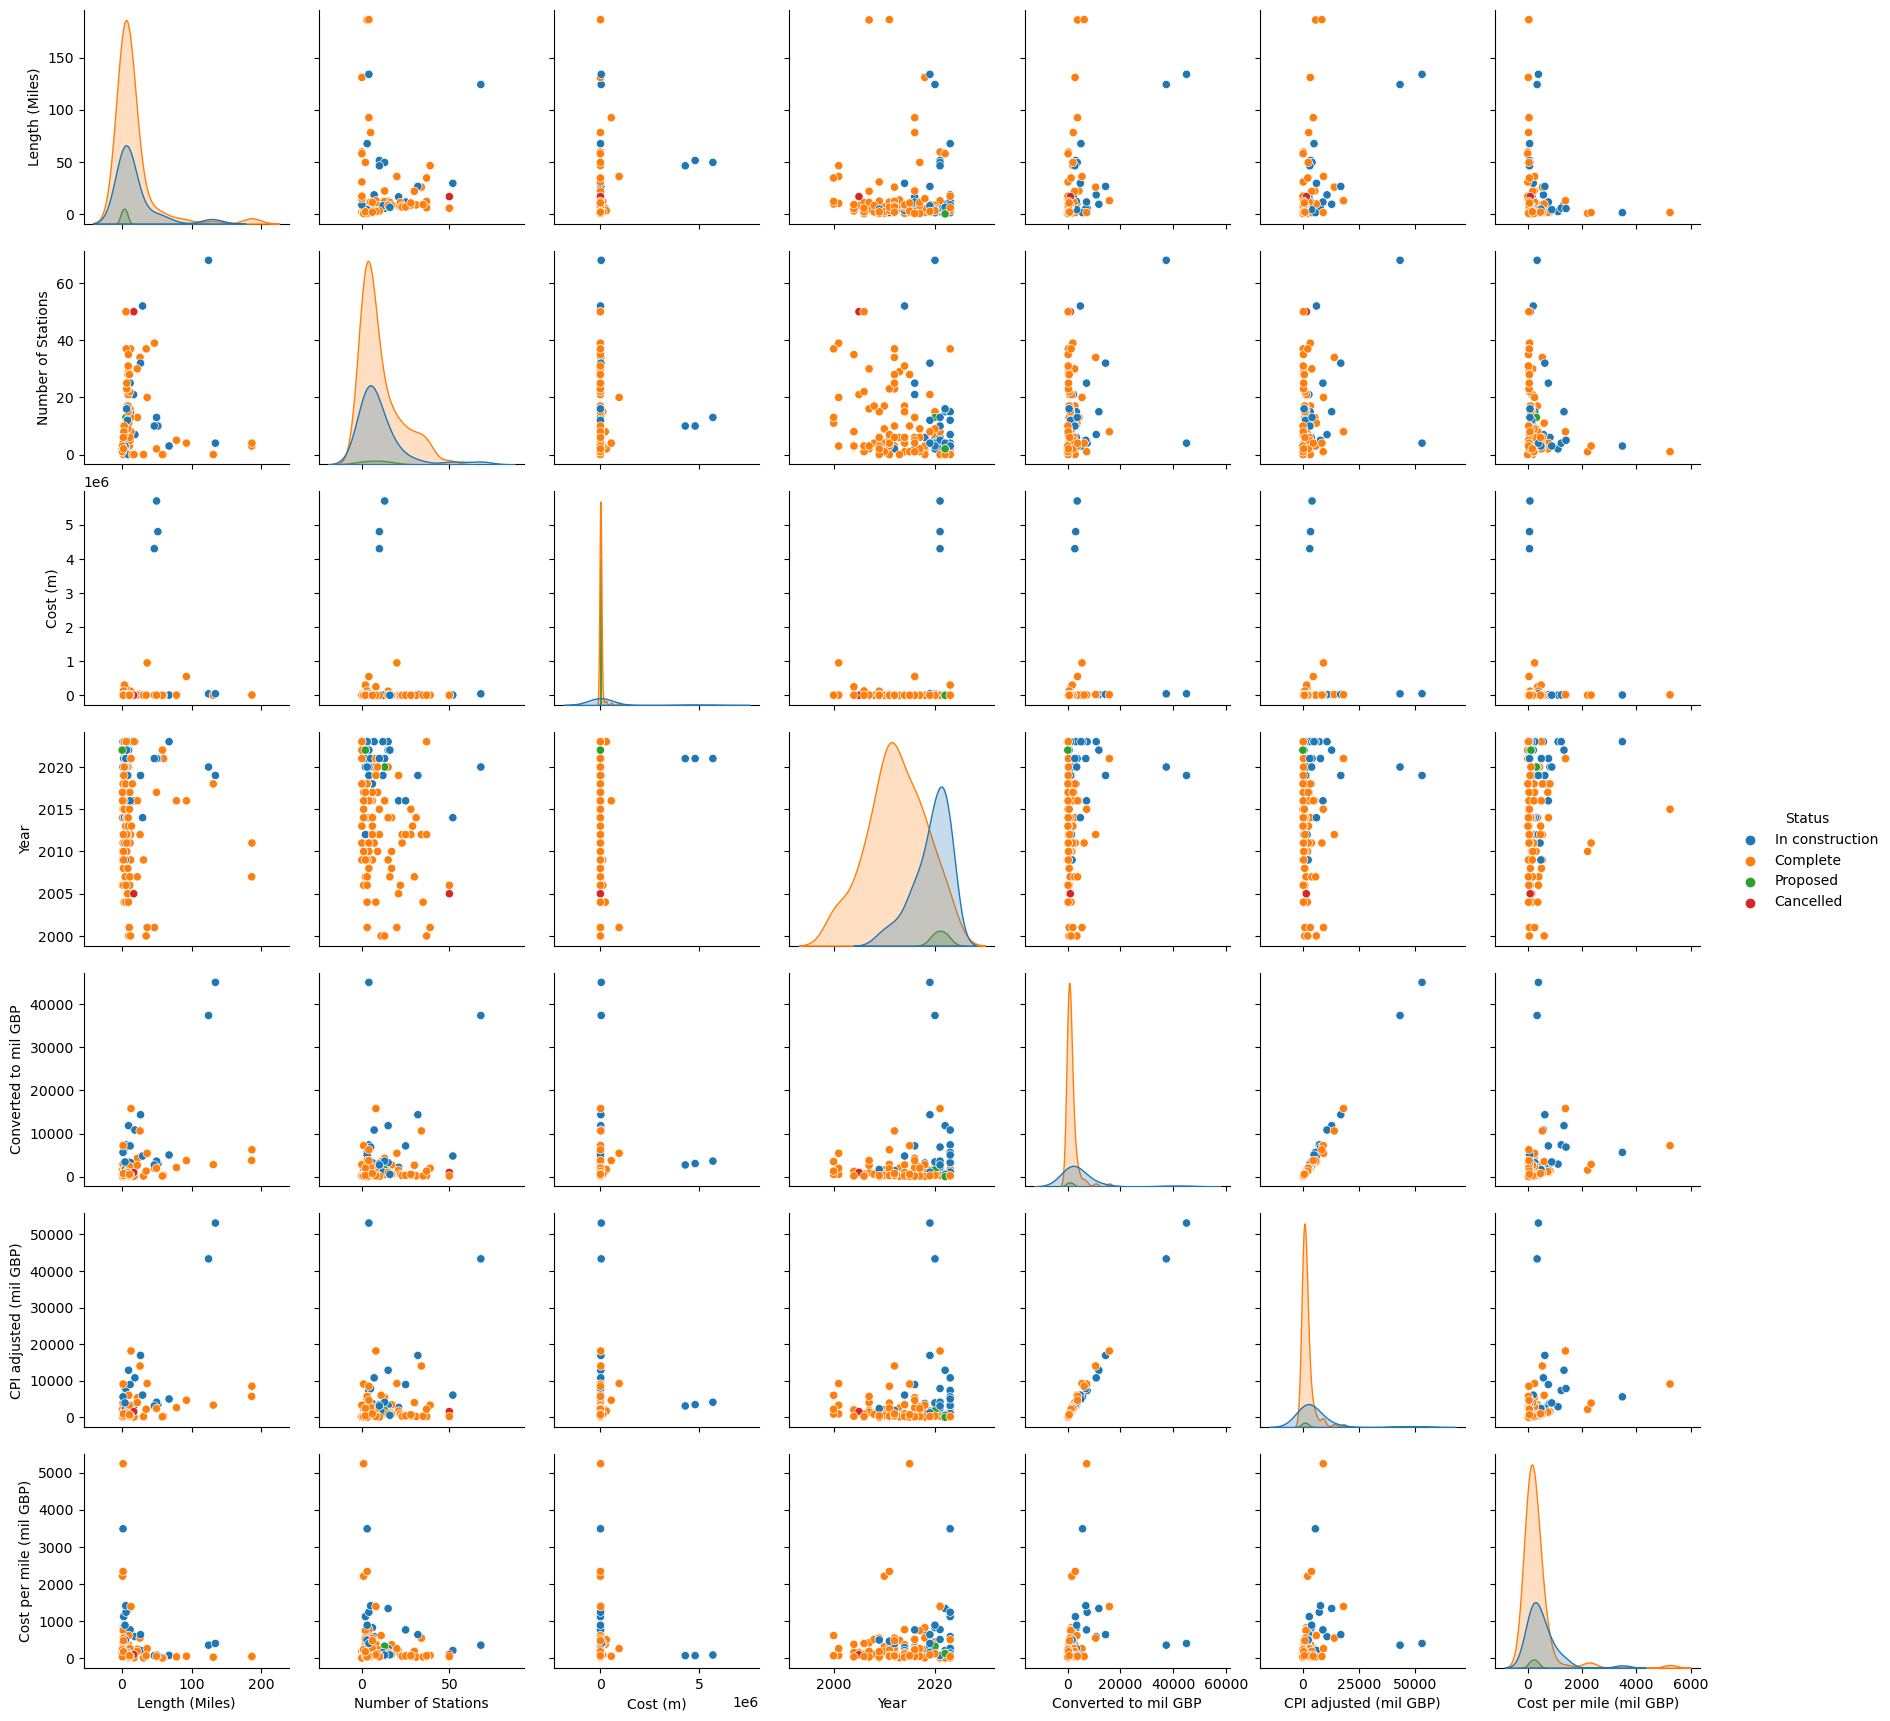

In [25]:
sns.pairplot(data=df,hue='Status')

<Axes: xlabel='Length (Miles)', ylabel='Density'>

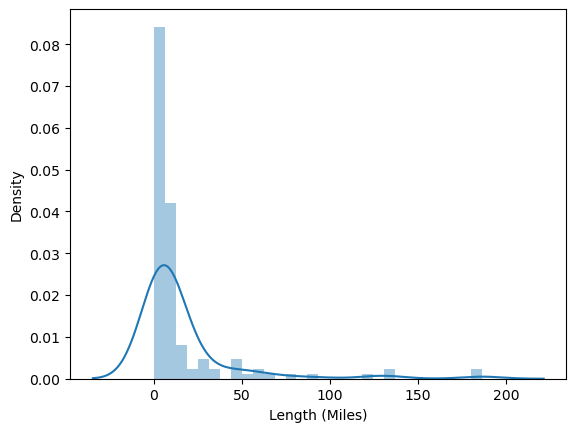

In [26]:
sns.distplot(df['Length (Miles)'],bins=30)

<Axes: xlabel='Cost (m)', ylabel='Density'>

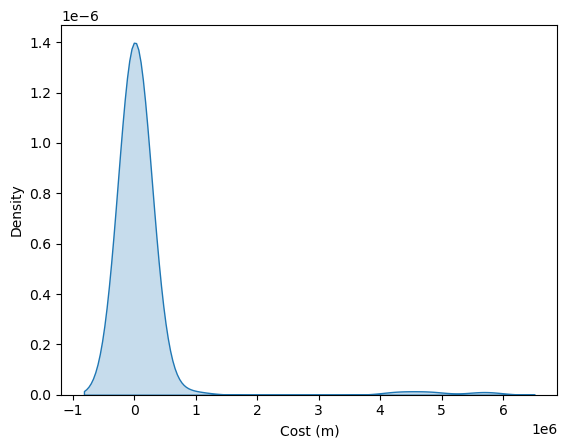

In [27]:
sns.kdeplot(data=df['Cost (m)'], shade=True)

In [28]:

fig1 = px.bar(df, x ="Project title", y = "Length (Miles)", color='Status',
             width=1100, height=800,title= "Project Name vs Length In Miles")
fig1.show()

In [29]:
fig2 = px.pie(df, values='Length (Miles)', names='Country', title='Length in relation to Country')

fig2.show()

In [30]:
fig3 = px.bar(df, x = "City", y = "Length (Miles)", color='Country',
             width=1100, height=800, title=" City vs Length in Miles ", )
fig3.show()

In [31]:
fig4 = px.pie(df, values='Length (Miles)', names='Environment', title='Length in relation to Environment')

fig4.show()

In [32]:
fig5 = px.pie(df, values='Length (Miles)', names='Project title', title='Length in relation to Project Title')

fig5.show()

[Text(0, 0, '41'), Text(0, 0, '94'), Text(0, 0, '2'), Text(0, 0, '1')]

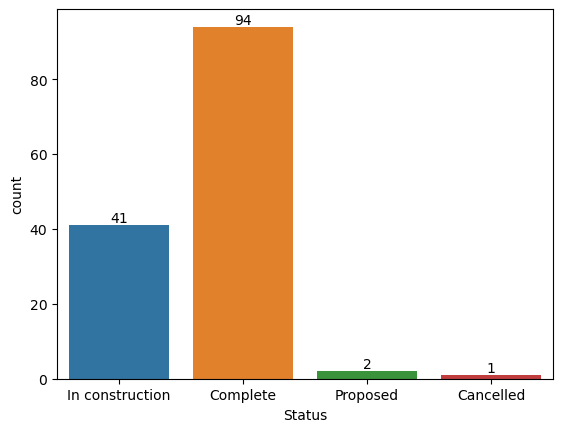

In [33]:
ax = sns.countplot(data=df,x='Status')
ax.bar_label(ax.containers[0])

In [34]:
co = pd.get_dummies(df['Country'],drop_first=True)
co

Canada  Denmark  France  Germany  Italy  Japan  Norway  Singapore  \
0         1        0       0        0      0      0       0          0   
1         1        0       0        0      0      0       0          0   
2         1        0       0        0      0      0       0          0   
3         1        0       0        0      0      0       0          0   
4         1        0       0        0      0      0       0          0   
..      ...      ...     ...      ...    ...    ...     ...        ...   
133       0        0       1        0      0      0       0          0   
134       0        0       0        1      0      0       0          0   
135       0        0       0        1      0      0       0          0   
136       0        0       0        1      0      0       0          0   
137       0        0       0        0      0      0       0          0   

     South Korea  Spain  Sweden  UK  US  
0              0      0       0   0   0  
1              0      0       0   0   0  
2              0      0       0   0   0  
3              0      0       0   0   0  
4              0      0       0   0   0  
..           ...    ...     ...  ..  ..  
133            0      0       0   0   0  
134            0      0       0   0   0  
135            0      0       0   0   0  
136            0      0       0   0   0  
137            0      0       0   1   0  

[138 rows x 13 columns]

In [35]:
env = pd.get_dummies(df['Environment'],drop_first=True)
env

Suburban  Urban
0           0      1
1           0      1
2           0      1
3           0      1
4           0      1
..        ...    ...
133         0      1
134         0      1
135         0      1
136         0      1
137         0      1

[138 rows x 2 columns]

In [36]:
sta = pd.get_dummies(df['Status'],drop_first=True)
sta

Complete  In construction  Proposed
0           0                1         0
1           1                0         0
2           0                1         0
3           0                1         0
4           0                1         0
..        ...              ...       ...
133         1                0         0
134         1                0         0
135         1                0         0
136         1                0         0
137         1                0         0

[138 rows x 3 columns]

In [37]:
pro = pd.get_dummies(df['Type of project'],drop_first=True)
pro

Line extension  New Line  New tunnel
0                 1         0           0
1                 1         0           0
2                 1         0           0
3                 0         1           0
4                 1         0           0
..              ...       ...         ...
133               1         0           0
134               1         0           0
135               1         0           0
136               0         1           0
137               1         0           0

[138 rows x 3 columns]

In [38]:
df1 = pd.concat([df,co,env,sta,pro],axis=1)

In [39]:
df1.head()

Project title Country       City Environment     Line name  \
0                Broadway  Canada  Vancouver       Urban     Millenium   
1                 Vaughan  Canada    Toronto       Urban        Line 1   
2             Scarborough  Canada    Toronto       Urban        Line 2   
3                 Ontario  Canada    Toronto       Urban  Ontario Line   
4  Yonge to Richmond Hill  Canada    Toronto       Urban        Line 1   

                                         Description           Status  \
0  Extension of existing millennium line to add i...  In construction   
1       Extension of existing line to a new terminus         Complete   
2  Will extend existing subway to the city of Sca...  In construction   
3             New line through the centre of Toronto  In construction   
4          Extending an existing line to new suburbs  In construction   

  Start planning Start Construction End Year  ...  UK  US Suburban Urban  \
0           2018               2020     2025  ...   0   0        0     1   
1           2005               2009     2017  ...   0   0        0     1   
2           2020               2023     2030  ...   0   0        0     1   
3           2019               2022     2031  ...   0   0        0     1   
4           2021               2023     2030  ...   0   0        0     1   

  Complete In construction Proposed Line extension  New Line New tunnel  
0        0               1        0              1         0          0  
1        1               0        0              1         0          0  
2        0               1        0              1         0          0  
3        0               1        0              0         1          0  
4        0               1        0              1         0          0  

[5 rows x 46 columns]

In [40]:
df1.drop(['Country','Environment','Status','Project title','City','Line name','Description','Start planning','Start Construction','End Year','Type of project','Type of Line','Tunnel percentage','Elevated percentage','Tunnelling method','Source','Currency','Year','Converted to mil GBP','CPI adjusted (mil GBP)','Cost per mile (mil GBP)','Source 1'],axis=1,inplace=True)

In [42]:
df1.head()

Length (Miles)  Number of Stations  Cost (m)  Canada  Denmark  France  \
0            3.54                   6    2830.0       1        0       0   
1            5.34                   6    3200.0       1        0       0   
2            4.84                   3    5500.0       1        0       0   
3            9.63                  15   19000.0       1        0       0   
4            4.60                   6    5600.0       1        0       0   

   Germany  Italy  Japan  Norway  ...  UK  US  Suburban  Urban  Complete  \
0        0      0      0       0  ...   0   0         0      1         0   
1        0      0      0       0  ...   0   0         0      1         1   
2        0      0      0       0  ...   0   0         0      1         0   
3        0      0      0       0  ...   0   0         0      1         0   
4        0      0      0       0  ...   0   0         0      1         0   

   In construction  Proposed  Line extension  New Line  New tunnel  
0                1         0               1         0           0  
1                0         0               1         0           0  
2                1         0               1         0           0  
3                1         0               0         1           0  
4                1         0               1         0           0  

[5 rows x 24 columns]

In [43]:
df1.drop(['Cost (m)'],axis=1)

Length (Miles)  Number of Stations  Canada  Denmark  France  Germany  \
0              3.54                   6       1        0       0        0   
1              5.34                   6       1        0       0        0   
2              4.84                   3       1        0       0        0   
3              9.63                  15       1        0       0        0   
4              4.60                   6       1        0       0        0   
..              ...                 ...     ...      ...     ...      ...   
133            0.93                   3       0        0       1        0   
134            0.81                   1       0        0       0        1   
135            2.42                   2       0        0       0        1   
136            2.11                   6       0        0       0        1   
137           10.87                  28       0        0       0        0   

     Italy  Japan  Norway  Singapore  ...  UK  US  Suburban  Urban  Complete  \
0        0      0       0          0  ...   0   0         0      1         0   
1        0      0       0          0  ...   0   0         0      1         1   
2        0      0       0          0  ...   0   0         0      1         0   
3        0      0       0          0  ...   0   0         0      1         0   
4        0      0       0          0  ...   0   0         0      1         0   
..     ...    ...     ...        ...  ...  ..  ..       ...    ...       ...   
133      0      0       0          0  ...   0   0         0      1         1   
134      0      0       0          0  ...   0   0         0      1         1   
135      0      0       0          0  ...   0   0         0      1         1   
136      0      0       0          0  ...   0   0         0      1         1   
137      0      0       0          0  ...   1   0         0      1         1   

     In construction  Proposed  Line extension  New Line  New tunnel  
0                  1         0               1         0           0  
1                  0         0               1         0           0  
2                  1         0               1         0           0  
3                  1         0               0         1           0  
4                  1         0               1         0           0  
..               ...       ...             ...       ...         ...  
133                0         0               1         0           0  
134                0         0               1         0           0  
135                0         0               1         0           0  
136                0         0               0         1           0  
137                0         0               1         0           0  

[138 rows x 23 columns]

In [44]:
X = df1.drop(['Cost (m)'],axis=1)
y = df['Cost (m)'] 

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [47]:
lm=LinearRegression()

In [48]:
lm.fit(X_train,y_train)

LinearRegression()

In [49]:
lm.coef_

array([ 1.66272206e+02,  3.18357308e+02,  3.60517560e+03,  2.32858143e+04,
       -2.89073393e+03,  1.78508465e+03,  1.08985924e+03,  3.20974822e+05,
        1.33342526e+04,  5.31530353e+03,  4.98831718e+06, -3.49177871e+03,
        1.30204540e+04,  3.33816443e+03,  1.08578885e+04,  8.60535119e+03,
       -8.60535119e+03,  1.60835675e+04,  2.11109065e+04,  2.03258639e+04,
        6.82210757e+03,  1.36764306e+04,  1.64693300e+04])

In [50]:
predictions = lm.predict(X_test)
predictions

array([-6.14015603e+02, -3.31711528e+03,  4.03500306e+03,  4.34588246e+03,
        3.22847784e+05,  3.16368134e+05,  3.19442076e+05,  1.82196591e+04,
        4.56100238e+03,  1.04738852e+04,  6.57953472e+03, -3.96806883e+03,
       -5.21243064e+03,  3.28363595e+05, -2.59210052e+02, -3.36057238e+03,
        3.94401456e+04,  9.29170746e+03,  9.39264458e+03, -4.27733514e+03,
        9.59078151e+03, -5.45902310e+02,  5.00010080e+06, -1.49992155e+03,
        1.17877139e+04, -9.53027021e+02, -9.93063788e+03,  7.25508880e+03,
        5.57242157e+02,  4.93192333e+03, -3.87853435e+02,  2.01778159e+03,
        9.00904762e+03, -1.66789599e+03, -4.12192742e+03, -9.61529049e+03,
       -5.50282786e+03, -7.22150848e+02,  5.89648841e+02,  8.39713518e+03,
        1.99721172e+04, -4.13843203e+02])

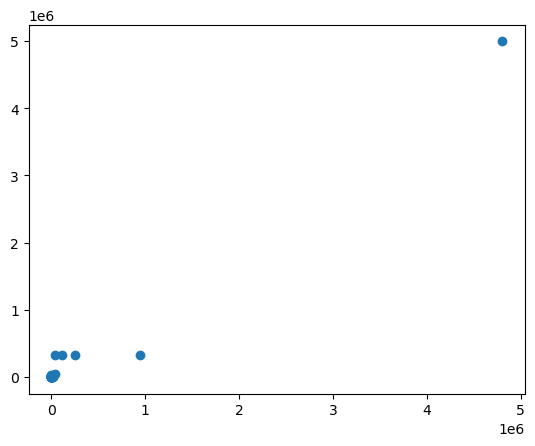

In [51]:
plt.scatter(y_test,predictions)

In [52]:
metrics.explained_variance_score(y_test,predictions)

0.9761630395991346

<Axes: >

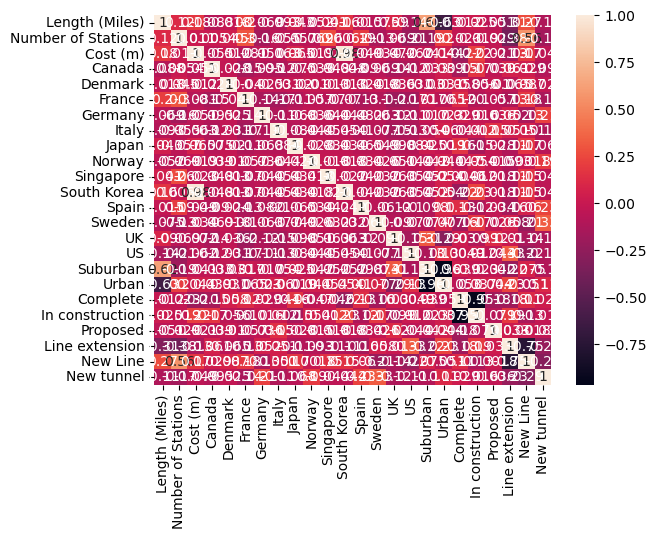

In [53]:
sns.heatmap(df1.corr(),annot=True)